## For Core PCOS Dataset

In [ ]:
# Step 1: Loading and Preparing the Core PCOS Dataset for SVM Modeling

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
core_pcos_df = pd.read_csv("Core_PCOS_Dataset_Cleaned.csv")

# Clean column names
core_pcos_df.columns = core_pcos_df.columns.str.strip()

# Select features and target
selected_features = [
    "Age (yrs)", "BMI", "hair growth(Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)"
]
target_column = "PCOS (Y/N)"

# Prepare X and y
X = core_pcos_df[selected_features].copy()
y = core_pcos_df[target_column].astype(int)

# Drop rows with missing values
X = X.dropna()
y = y.loc[X.index]

# Standardize features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)
X_scaled_df["PCOS (Y/N)"] = y.values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output shapes for verification
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((865, 5), (217, 5), (865,), (217,))

In [ ]:

print(X_scaled_df.head(25).to_string(index=False))

 Age (yrs)       BMI  hair growth(Y/N)  Hair loss(Y/N)  Pimples(Y/N)  PCOS (Y/N)
 -0.839804 -1.728913         -0.398068       -0.541029     -0.569524           0
  1.249688  0.225533         -0.398068       -0.541029     -0.569524           0
  0.466129  0.365136         -0.398068        1.848331      1.755853           1
  1.510875  1.900772         -0.398068       -0.541029     -0.569524           0
 -1.623363 -1.449706         -0.398068        1.848331     -0.569524           0
  1.249688  1.028251         -0.398068        1.848331     -0.569524           0
  0.727315  0.714144         -0.398068       -0.541029     -0.569524           0
  0.466129 -0.402682         -0.398068       -0.541029     -0.569524           0
  0.204942 -2.880639         -0.398068       -0.541029     -0.569524           0
  1.249688 -0.402682         -0.398068       -0.541029     -0.569524           0
 -2.929296  0.853747         -0.398068       -0.541029     -0.569524           0
 -1.362177 -1.798714        

In [ ]:
print(core_pcos_df.head())

   Sl. No  Patient File No.  PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)  \
0       1                 1           0       28.0         44.6       152.0   
1       2                 2           0       36.0         65.0       161.5   
2       3                 3           1       33.0         68.8       165.0   
3       4                 4           0       37.0         65.0       148.0   
4       5                 5           0       25.0         52.0       161.0   

    BMI  Blood Group  Pulse rate(bpm)  RR (breaths/min)  ...  Pimples(Y/N)  \
0  19.3         15.0             78.0              22.0  ...           0.0   
1  24.9         15.0             74.0              20.0  ...           0.0   
2  25.3         11.0             72.0              18.0  ...           1.0   
3  29.7         13.0             72.0              20.0  ...           0.0   
4  20.1         11.0             72.0              18.0  ...           0.0   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmH

In [ ]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (865, 5)
Testing Data Shape: (217, 5)


In [ ]:
print(pd.DataFrame(X_train, columns=selected_features).head(30))

    Age (yrs)       BMI  hair growth(Y/N)  Hair loss(Y/N)  Pimples(Y/N)
0   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
1   -1.623363 -2.287326         -0.398068        1.848331      1.755853
2   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
3   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
4   -1.100990 -1.379905         -0.398068       -0.541029     -0.569524
5    2.555621 -2.671235          2.512133       -0.541029      1.755853
6   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
7    1.249688  0.190632         -0.398068        1.848331      1.755853
8   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
9   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
10  -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
11  -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
12  -0.056244 -0.018773         -0.398068       -0.541029     -0

In [ ]:
print(pd.DataFrame(X_test, columns=selected_features).head(30))

    Age (yrs)       BMI  hair growth(Y/N)  Hair loss(Y/N)  Pimples(Y/N)
0    1.772061 -0.821492         -0.398068       -0.541029     -0.569524
1   -0.317431 -2.566532         -0.398068       -0.541029     -0.569524
2   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
3   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
4   -2.145736 -0.926194         -0.398068       -0.541029     -0.569524
5   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
6   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
7   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
8    0.466129 -0.088575         -0.398068       -0.541029     -0.569524
9   -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
10  -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
11  -0.056244 -0.018773         -0.398068       -0.541029     -0.569524
12   0.727315  1.377260         -0.398068       -0.541029     -0

In [ ]:
y_train

In [ ]:
# Step 2: Train Linear Kernel SVM with C=0.1

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Linear SVM with C=0.1
svm_linear_c01 = SVC(kernel='linear', C=0.1, random_state=42)
svm_linear_c01.fit(X_train, y_train)

# Predict
y_pred_linear_c01 = svm_linear_c01.predict(X_test)

# Evaluate
acc_linear_c01 = accuracy_score(y_test, y_pred_linear_c01)
cm_linear_c01 = confusion_matrix(y_test, y_pred_linear_c01)
cr_linear_c01 = classification_report(y_test, y_pred_linear_c01)

# Display results
print("Linear Kernel - C=0.1")
print(f"Accuracy: {acc_linear_c01:.2f}")
print("Confusion Matrix:")
print(cm_linear_c01)
print("\nClassification Report:")
print(cr_linear_c01)


Linear Kernel - C=0.1
Accuracy: 0.75
Confusion Matrix:
[[140   8]
 [ 47  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       148
           1       0.73      0.32      0.44        69

    accuracy                           0.75       217
   macro avg       0.74      0.63      0.64       217
weighted avg       0.74      0.75      0.71       217



In [ ]:
# Step 3: Train Linear Kernel SVM with C=1

# Train Linear SVM with C=1
svm_linear_c1 = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear_c1.fit(X_train, y_train)

# Predict
y_pred_linear_c1 = svm_linear_c1.predict(X_test)

# Evaluate
acc_linear_c1 = accuracy_score(y_test, y_pred_linear_c1)
cm_linear_c1 = confusion_matrix(y_test, y_pred_linear_c1)
cr_linear_c1 = classification_report(y_test, y_pred_linear_c1)

# Display results
print("Linear Kernel - C=1")
print(f"Accuracy: {acc_linear_c1:.2f}")
print("Confusion Matrix:")
print(cm_linear_c1)
print("\nClassification Report:")
print(cr_linear_c1)


Linear Kernel - C=1
Accuracy: 0.75
Confusion Matrix:
[[140   8]
 [ 47  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       148
           1       0.73      0.32      0.44        69

    accuracy                           0.75       217
   macro avg       0.74      0.63      0.64       217
weighted avg       0.74      0.75      0.71       217



In [ ]:
# Step 4: Train Linear Kernel SVM with C=10

# Train Linear SVM with C=10
svm_linear_c10 = SVC(kernel='linear', C=10.0, random_state=42)
svm_linear_c10.fit(X_train, y_train)

# Predict
y_pred_linear_c10 = svm_linear_c10.predict(X_test)

# Evaluate
acc_linear_c10 = accuracy_score(y_test, y_pred_linear_c10)
cm_linear_c10 = confusion_matrix(y_test, y_pred_linear_c10)
cr_linear_c10 = classification_report(y_test, y_pred_linear_c10)

# Display results
print("Linear Kernel - C=10")
print(f"Accuracy: {acc_linear_c10:.2f}")
print("Confusion Matrix:")
print(cm_linear_c10)
print("\nClassification Report:")
print(cr_linear_c10)


Linear Kernel - C=10
Accuracy: 0.75
Confusion Matrix:
[[140   8]
 [ 47  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       148
           1       0.73      0.32      0.44        69

    accuracy                           0.75       217
   macro avg       0.74      0.63      0.64       217
weighted avg       0.74      0.75      0.71       217



In [ ]:
# Step 5: Train Polynomial Kernel SVM with C=0.1

# Train Polynomial Kernel SVM with C=0.1 (degree=3)
svm_poly_c01 = SVC(kernel='poly', degree=3, C=0.1, random_state=42)
svm_poly_c01.fit(X_train, y_train)

# Predict
y_pred_poly_c01 = svm_poly_c01.predict(X_test)

# Evaluate
acc_poly_c01 = accuracy_score(y_test, y_pred_poly_c01)
cm_poly_c01 = confusion_matrix(y_test, y_pred_poly_c01)
cr_poly_c01 = classification_report(y_test, y_pred_poly_c01)

# Display results
print("Polynomial Kernel (degree=3) - C=0.1")
print(f"Accuracy: {acc_poly_c01:.2f}")
print("Confusion Matrix:")
print(cm_poly_c01)
print("\nClassification Report:")
print(cr_poly_c01)


Polynomial Kernel (degree=3) - C=0.1
Accuracy: 0.75
Confusion Matrix:
[[141   7]
 [ 48  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       148
           1       0.75      0.30      0.43        69

    accuracy                           0.75       217
   macro avg       0.75      0.63      0.63       217
weighted avg       0.75      0.75      0.71       217



In [ ]:
# Step 6: Train Polynomial Kernel SVM with C=1

# Train Polynomial Kernel SVM with C=1 (degree=3)
svm_poly_c1 = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly_c1.fit(X_train, y_train)

# Predict
y_pred_poly_c1 = svm_poly_c1.predict(X_test)

# Evaluate
acc_poly_c1 = accuracy_score(y_test, y_pred_poly_c1)
cm_poly_c1 = confusion_matrix(y_test, y_pred_poly_c1)
cr_poly_c1 = classification_report(y_test, y_pred_poly_c1)

# Display results
print("Polynomial Kernel (degree=3) - C=1")
print(f"Accuracy: {acc_poly_c1:.2f}")
print("Confusion Matrix:")
print(cm_poly_c1)
print("\nClassification Report:")
print(cr_poly_c1)


Polynomial Kernel (degree=3) - C=1
Accuracy: 0.73
Confusion Matrix:
[[139   9]
 [ 49  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       148
           1       0.69      0.29      0.41        69

    accuracy                           0.73       217
   macro avg       0.71      0.61      0.62       217
weighted avg       0.72      0.73      0.69       217



In [ ]:
# Step 7: Train Polynomial Kernel SVM with C=10

# Train Polynomial Kernel SVM with C=10 (degree=3)
svm_poly_c10 = SVC(kernel='poly', degree=3, C=10.0, random_state=42)
svm_poly_c10.fit(X_train, y_train)

# Predict
y_pred_poly_c10 = svm_poly_c10.predict(X_test)

# Evaluate
acc_poly_c10 = accuracy_score(y_test, y_pred_poly_c10)
cm_poly_c10 = confusion_matrix(y_test, y_pred_poly_c10)
cr_poly_c10 = classification_report(y_test, y_pred_poly_c10)

# Display results
print("Polynomial Kernel (degree=3) - C=10")
print(f"Accuracy: {acc_poly_c10:.2f}")
print("Confusion Matrix:")
print(cm_poly_c10)
print("\nClassification Report:")
print(cr_poly_c10)


Polynomial Kernel (degree=3) - C=10
Accuracy: 0.74
Confusion Matrix:
[[140   8]
 [ 49  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       148
           1       0.71      0.29      0.41        69

    accuracy                           0.74       217
   macro avg       0.73      0.62      0.62       217
weighted avg       0.73      0.74      0.70       217



In [ ]:
# Step 8: Train RBF Kernel SVM with C=0.1

# Train RBF Kernel SVM with C=0.1
svm_rbf_c01 = SVC(kernel='rbf', C=0.1, random_state=42)
svm_rbf_c01.fit(X_train, y_train)

# Predict
y_pred_rbf_c01 = svm_rbf_c01.predict(X_test)

# Evaluate
acc_rbf_c01 = accuracy_score(y_test, y_pred_rbf_c01)
cm_rbf_c01 = confusion_matrix(y_test, y_pred_rbf_c01)
cr_rbf_c01 = classification_report(y_test, y_pred_rbf_c01)

# Display results
print("RBF Kernel - C=0.1")
print(f"Accuracy: {acc_rbf_c01:.2f}")
print("Confusion Matrix:")
print(cm_rbf_c01)
print("\nClassification Report:")
print(cr_rbf_c01)


RBF Kernel - C=0.1
Accuracy: 0.72
Confusion Matrix:
[[144   4]
 [ 57  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83       148
           1       0.75      0.17      0.28        69

    accuracy                           0.72       217
   macro avg       0.73      0.57      0.55       217
weighted avg       0.73      0.72      0.65       217



In [ ]:
# Step 9: Train RBF Kernel SVM with C=1

# Train RBF Kernel SVM with C=1
svm_rbf_c1 = SVC(kernel='rbf', C=1.0, random_state=42)
svm_rbf_c1.fit(X_train, y_train)

# Predict
y_pred_rbf_c1 = svm_rbf_c1.predict(X_test)

# Evaluate
acc_rbf_c1 = accuracy_score(y_test, y_pred_rbf_c1)
cm_rbf_c1 = confusion_matrix(y_test, y_pred_rbf_c1)
cr_rbf_c1 = classification_report(y_test, y_pred_rbf_c1)

# Display results
print("RBF Kernel - C=1")
print(f"Accuracy: {acc_rbf_c1:.2f}")
print("Confusion Matrix:")
print(cm_rbf_c1)
print("\nClassification Report:")
print(cr_rbf_c1)


RBF Kernel - C=1
Accuracy: 0.75
Confusion Matrix:
[[141   7]
 [ 48  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       148
           1       0.75      0.30      0.43        69

    accuracy                           0.75       217
   macro avg       0.75      0.63      0.63       217
weighted avg       0.75      0.75      0.71       217



In [ ]:
# Step 9: Train RBF Kernel SVM with C=10

# Train RBF Kernel SVM with C=10
svm_rbf_c10 = SVC(kernel='rbf', C=10, random_state=42)
svm_rbf_c10.fit(X_train, y_train)

# Predict
y_pred_rbf_c10 = svm_rbf_c1.predict(X_test)

# Evaluate
acc_rbf_c10 = accuracy_score(y_test, y_pred_rbf_c1)
cm_rbf_c10 = confusion_matrix(y_test, y_pred_rbf_c1)
cr_rbf_c10 = classification_report(y_test, y_pred_rbf_c1)

# Display results
print("RBF Kernel - C=10")
print(f"Accuracy: {acc_rbf_c1:.2f}")
print("Confusion Matrix:")
print(cm_rbf_c10)
print("\nClassification Report:")
print(cr_rbf_c10)


RBF Kernel - C=10
Accuracy: 0.72
Confusion Matrix:
[[137  11]
 [ 50  19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       148
           1       0.63      0.28      0.38        69

    accuracy                           0.72       217
   macro avg       0.68      0.60      0.60       217
weighted avg       0.70      0.72      0.68       217



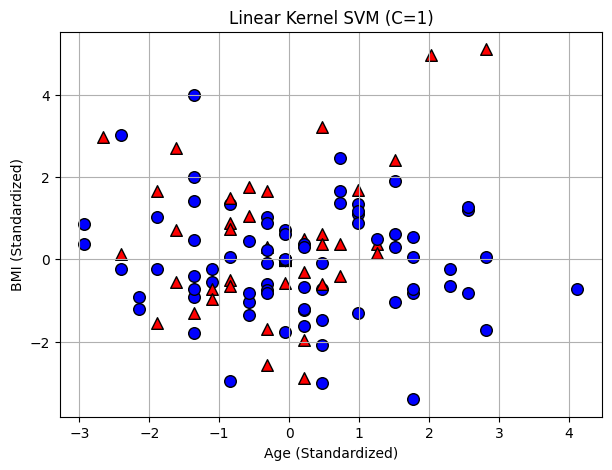

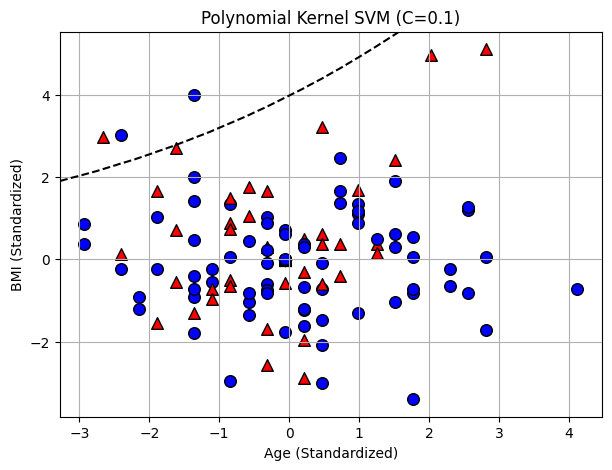

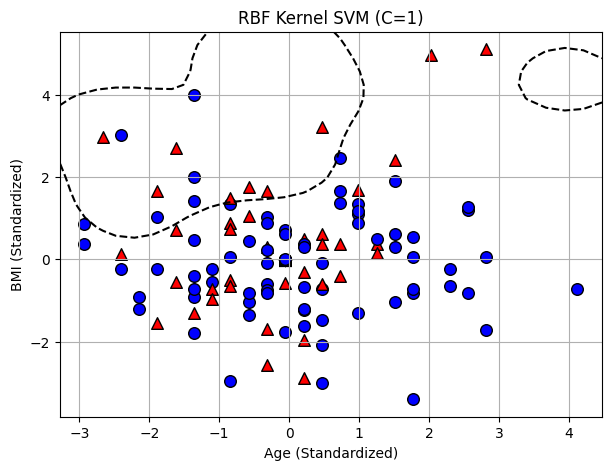

In [ ]:
# Step: Create clean linear-style SVM plots (like your uploaded style)

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

X_train_simple = X_train[:, :2]
X_test_simple = X_test[:, :2]

# Train again (small models for plotting)
svm_linear_c1_simple = SVC(kernel='linear', C=10, random_state=42)
svm_linear_c1_simple.fit(X_train_simple, y_train)

svm_poly_c01_simple = SVC(kernel='poly', degree=3, C=0.1, random_state=42)
svm_poly_c01_simple.fit(X_train_simple, y_train)

svm_rbf_c1_simple = SVC(kernel='rbf', C=1.0, random_state=42)
svm_rbf_c1_simple.fit(X_train_simple, y_train)

# Plotting function
def plot_svm_separator(model, X, y, title):
    plt.figure(figsize=(7, 5))
    colors = ['blue' if label == 0 else 'red' for label in y]
    markers = ['o' if label == 0 else '^' for label in y]

    # Plot data points
    for i in range(len(y)):
        plt.scatter(X[i, 0], X[i, 1], color=colors[i], marker=markers[i], edgecolor='k', s=70)

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[0], linestyles='--')

    plt.title(title)
    plt.xlabel("Age (Standardized)")
    plt.ylabel("BMI (Standardized)")
    plt.grid(True)
    plt.show()

# Plot each SVM
plot_svm_separator(svm_linear_c1_simple, X_test_simple, y_test.values, "Linear Kernel SVM (C=1)")
plot_svm_separator(svm_poly_c01_simple, X_test_simple, y_test.values, "Polynomial Kernel SVM (C=0.1)")
plot_svm_separator(svm_rbf_c1_simple, X_test_simple, y_test.values, "RBF Kernel SVM (C=1)")


In [ ]:
import numpy as np

# Given point
x1 = 2
x2 = 3
r = 1  # Constant term
d = 2  # Degree

# Perform the polynomial feature mapping manually
x1_sq = x1 ** 2
x2_sq = x2 ** 2
sqrt2_x1x2 = np.sqrt(2) * x1 * x2
sqrt2_r_x1 = np.sqrt(2) * r * x1
sqrt2_r_x2 = np.sqrt(2) * r * x2
r_term = r

# Create the new feature vector
phi = np.array([x1_sq, sqrt2_x1x2, x2_sq, sqrt2_r_x1, sqrt2_r_x2, r_term])

# Display the mapped higher-dimensional point
print("Original Point (2D): (", x1, ",", x2, ")")
print("Mapped Point (6D) after Polynomial Kernel Transformation:")
print(phi)


Original Point (2D): ( 2 , 3 )
Mapped Point (6D) after Polynomial Kernel Transformation:
[4.         8.48528137 9.         2.82842712 4.24264069 1.        ]


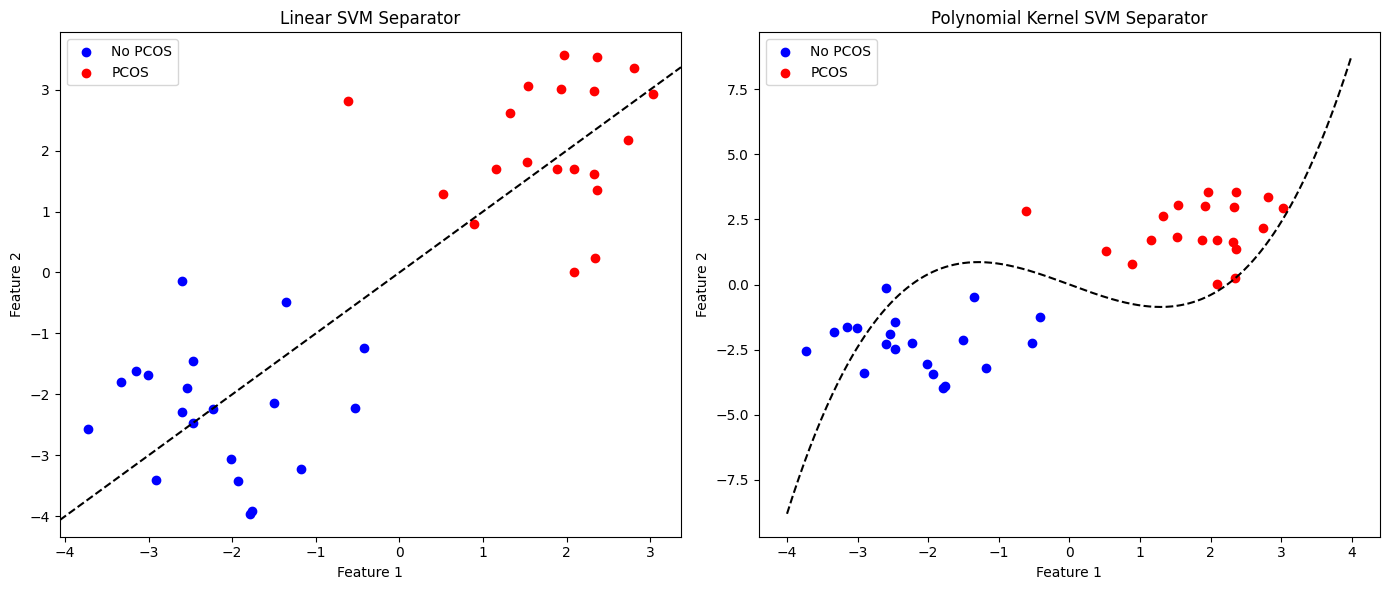

In [ ]:
# Step: Visualize Linear vs Polynomial SVM conceptually

import matplotlib.pyplot as plt
import numpy as np

# Create a simple synthetic dataset
np.random.seed(42)
class0 = np.random.randn(20, 2) - [2, 2]
class1 = np.random.randn(20, 2) + [2, 2]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Linear SVM Concept
axes[0].scatter(class0[:, 0], class0[:, 1], color='blue', label='No PCOS')
axes[0].scatter(class1[:, 0], class1[:, 1], color='red', label='PCOS')
axes[0].axline((-3, -3), (3, 3), color='black', linestyle='--')  # Linear separator
axes[0].set_title("Linear SVM Separator")
axes[0].legend()
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Plot Polynomial SVM Concept (simulating a curve separator)
theta = np.linspace(-4, 4, 400)
curve = 0.2 * theta**3 - theta

axes[1].scatter(class0[:, 0], class0[:, 1], color='blue', label='No PCOS')
axes[1].scatter(class1[:, 0], class1[:, 1], color='red', label='PCOS')
axes[1].plot(theta, curve, color='black', linestyle='--')  # Simulated curved separator
axes[1].set_title("Polynomial Kernel SVM Separator")
axes[1].legend()
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()
